In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
dataset_path = "/content/drive/MyDrive/FacialAgingProject/DATASET"


Classes: ['puffy eyes', 'clear skin', 'dark spots', 'wrinkles']
{'puffy eyes': 300, 'clear skin': 300, 'dark spots': 300, 'wrinkles': 300}


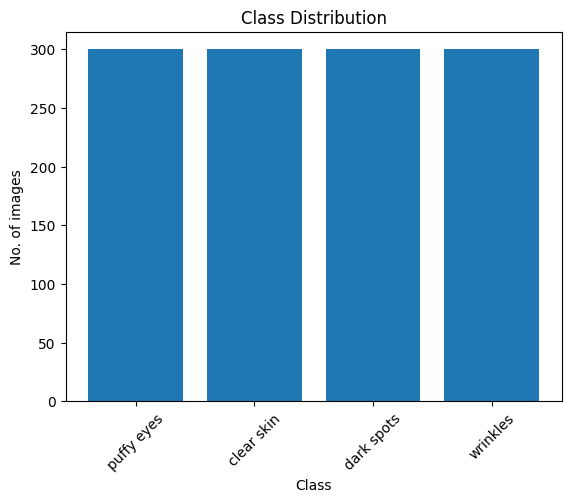

In [3]:
import os
import matplotlib.pyplot as plt

classes = os.listdir(dataset_path)
print("Classes:", classes)

class_counts = {}

for cls in classes:
    class_dir = os.path.join(dataset_path, cls)
    count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))])
    class_counts[cls] = count

print(class_counts)

# Plot distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("No. of images")
plt.xticks(rotation=45)
plt.show()


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [5]:
aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_aug_gen = aug_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 960 images belonging to 4 classes.


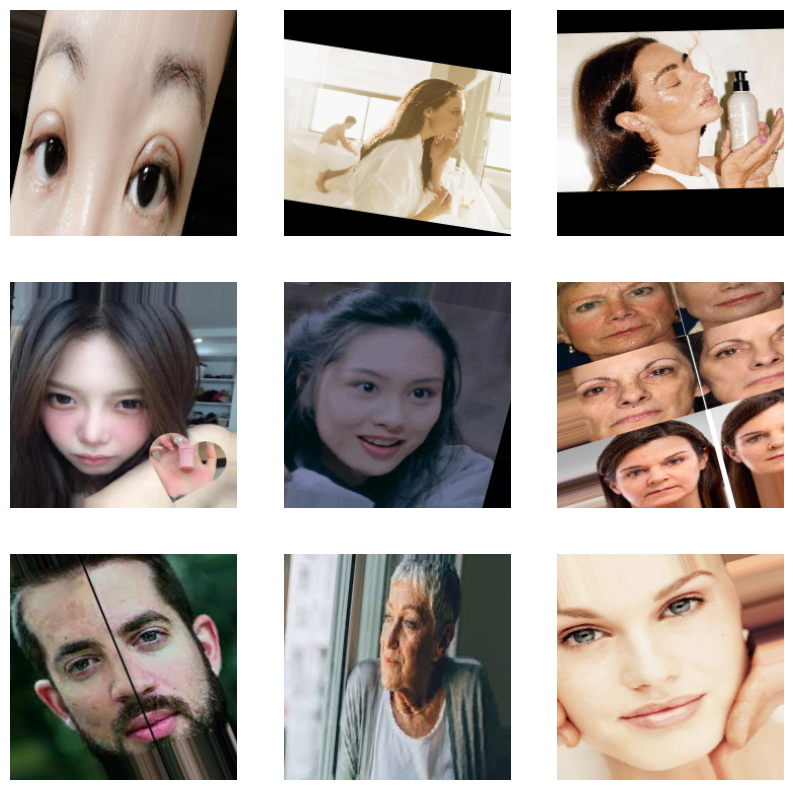

In [6]:
import numpy as np
import matplotlib.pyplot as plt

imgs, labels = next(train_aug_gen)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
plt.show()


In [7]:
label_map = train_aug_gen.class_indices
print("Label mapping:", label_map)


Label mapping: {'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}
